In [3]:
import pandas as pd
from sklearn.metrics import classification_report

In [4]:
import matplotlib.pyplot as plt

In [5]:
import numpy as np

In [6]:
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [7]:
import kaggle

kaggle.api.authenticate()
kaggle.api.dataset_download_files('gdabhishek/fertilizer-prediction', path='./datasets', unzip=True)

Dataset URL: https://www.kaggle.com/datasets/gdabhishek/fertilizer-prediction


In [69]:
df=pd.read_csv('C:\\Users\\palay\\OneDrive\\Desktop\\corn\\fertilizer\\datasets\\Fertilizer Prediction.csv')

In [9]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [10]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea
...,...,...,...,...,...,...,...,...,...
94,25,50,32,Clayey,Pulses,24,0,19,28-28
95,30,60,27,Red,Tobacco,4,17,17,10-26-26
96,38,72,51,Loamy,Wheat,39,0,0,Urea
97,36,60,43,Sandy,Millets,15,0,41,DAP


In [11]:
df['Crop Type'].unique()

array(['Maize', 'Sugarcane', 'Cotton', 'Tobacco', 'Paddy', 'Barley',
       'Wheat', 'Millets', 'Oil seeds', 'Pulses', 'Ground Nuts'],
      dtype=object)

In [12]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

In [77]:
print(df['Fertilizer Name'].value_counts()['Urea'])
print(df['Fertilizer Name'].value_counts()['DAP'])
print(df['Fertilizer Name'].value_counts()['14-35-14'])
print(df['Fertilizer Name'].value_counts()['28-28'])
print(df['Fertilizer Name'].value_counts()['17-17-17'])
print(df['Fertilizer Name'].value_counts()['20-20'])
print(df['Fertilizer Name'].value_counts()['10-26-26'])

22
18
14
17
7
14
7


<BarContainer object of 99 artists>

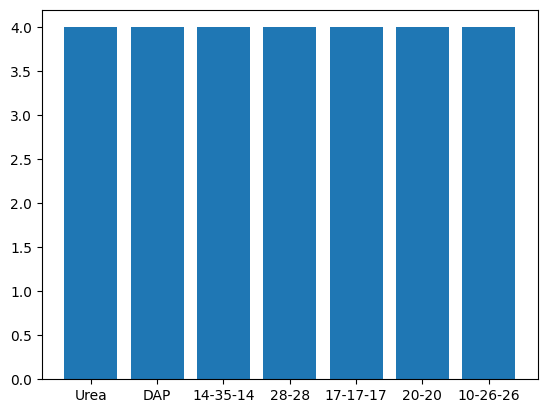

In [83]:
plt.bar(df['Fertilizer Name'],height=4)

In [13]:
print(df.columns)

Index(['Temparature', 'Humidity ', 'Moisture', 'Soil Type', 'Crop Type',
       'Nitrogen', 'Potassium', 'Phosphorous', 'Fertilizer Name'],
      dtype='object')


In [14]:


import seaborn as sns

<Axes: ylabel='Temparature'>

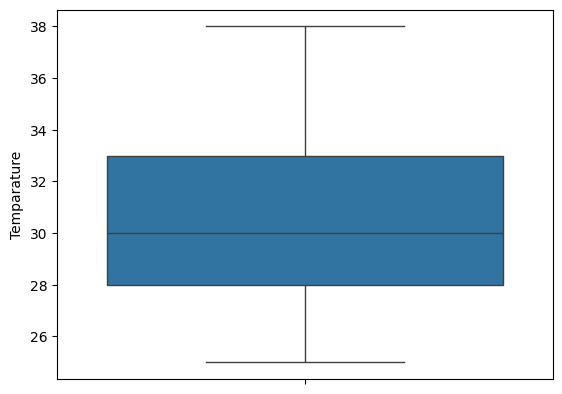

In [15]:


sns.boxplot(df['Temparature'])

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Temparature      99 non-null     int64 
 1   Humidity         99 non-null     int64 
 2   Moisture         99 non-null     int64 
 3   Soil Type        99 non-null     object
 4   Crop Type        99 non-null     object
 5   Nitrogen         99 non-null     int64 
 6   Potassium        99 non-null     int64 
 7   Phosphorous      99 non-null     int64 
 8   Fertilizer Name  99 non-null     object
dtypes: int64(6), object(3)
memory usage: 7.1+ KB


<Axes: ylabel='Moisture'>

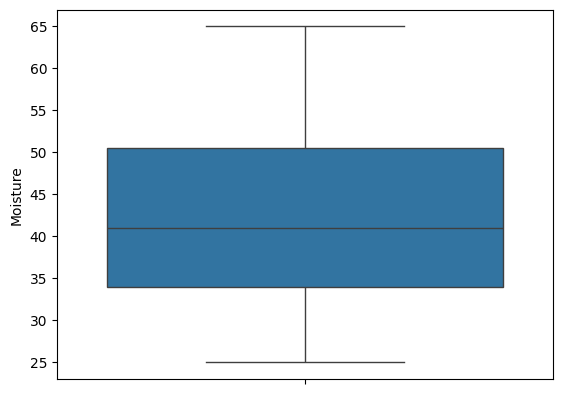

In [17]:


sns.boxplot(df['Moisture'])

<Axes: ylabel='Nitrogen'>

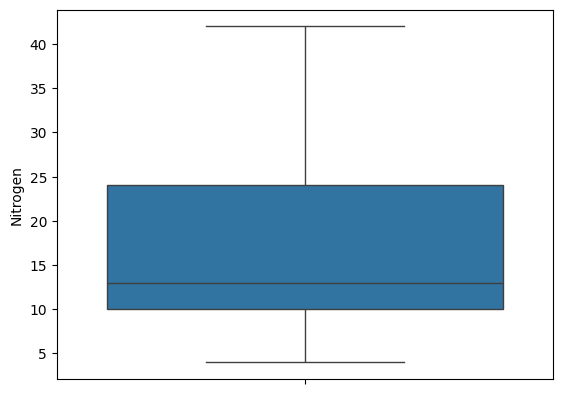

In [18]:

sns.boxplot(df['Nitrogen'])

In [19]:


from sklearn.preprocessing import LabelEncoder

In [20]:



label=LabelEncoder()


In [68]:
print(df['Fertilizer Name'].unique())


[6 5 1 4 2 3 0]


In [21]:
df['Soil Type']=label.fit_transform(df['Soil Type'])


df['Crop Type']=label.fit_transform(df['Crop Type'])

df['Fertilizer Name']=label.fit_transform(df['Fertilizer Name'])


In [22]:
df['Fertilizer Name'].unique()

array([6, 5, 1, 4, 2, 3, 0])

In [23]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,4,3,37,0,0,6
1,29,52,45,2,8,12,0,36,5
2,34,65,62,0,1,7,9,30,1
3,32,62,34,3,9,22,0,20,4
4,28,54,46,1,6,35,0,0,6
...,...,...,...,...,...,...,...,...,...
94,25,50,32,1,7,24,0,19,4
95,30,60,27,3,9,4,17,17,0
96,38,72,51,2,10,39,0,0,6
97,36,60,43,4,4,15,0,41,5


In [24]:
df['Soil Type'].unique()

array([4, 2, 0, 3, 1])

In [25]:
row_slice = df[54:100]
print(row_slice)

    Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
54           31         62        63          3          1        11   
55           27         53        43          0          4        23   
56           34         65        54          2         10        38   
57           29         58        37          4          4         8   
58           25         50        56          2          8        11   
59           32         62        34          3          2        15   
60           28         54        41          1          6        36   
61           30         60        49          2         10        13   
62           34         65        64          0          1        24   
63           28         54        47          4          0         5   
64           27         53        35          0          5        37   
65           36         68        62          3          1        15   
66           34         65        57          0          8      

In [26]:
row_slice = df[54:100]
print(row_slice)

    Temparature  Humidity   Moisture  Soil Type  Crop Type  Nitrogen  \
54           31         62        63          3          1        11   
55           27         53        43          0          4        23   
56           34         65        54          2         10        38   
57           29         58        37          4          4         8   
58           25         50        56          2          8        11   
59           32         62        34          3          2        15   
60           28         54        41          1          6        36   
61           30         60        49          2         10        13   
62           34         65        64          0          1        24   
63           28         54        47          4          0         5   
64           27         53        35          0          5        37   
65           36         68        62          3          1        15   
66           34         65        57          0          8      

In [27]:
print(df[170:])

Empty DataFrame
Columns: [Temparature, Humidity , Moisture, Soil Type, Crop Type, Nitrogen, Potassium, Phosphorous, Fertilizer Name]
Index: []


In [45]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier

In [46]:
num_cols = ['Temparature','Moisture','Nitrogen','Potassium','Phosphorous']
cat_cols = ['Soil Type', 'Crop Type']

In [47]:
num_cols , cat_cols

(['Temparature', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous'],
 ['Soil Type', 'Crop Type'])

In [48]:
preprocessor = ColumnTransformer(
    transformers=[
        ('encoder',OrdinalEncoder(),cat_cols),
        ('scaler',StandardScaler(),num_cols)
    ]
)

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler  # or any other preprocessor

# Example preprocessor (replace with your own)
preprocessor = StandardScaler()

params = {
    'max_depth': 5,
    'n_estimators': 100
}

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  
    ('Classifier', RandomForestClassifier(**params)) 
])


print(pipeline)


Pipeline(steps=[('preprocessor', StandardScaler()),
                ('Classifier', RandomForestClassifier(max_depth=5))])


In [59]:
df

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name,Temperature
0,26,52,-0.462064,4,3,1.567539,-0.584910,-1.387607,6,-1.229084
1,29,52,0.162128,2,8,-0.598658,-0.584910,1.297209,5,-0.368145
2,34,65,1.678023,0,1,-1.031898,0.970777,0.849740,1,1.066752
3,32,62,-0.818745,3,9,0.267821,-0.584910,0.103958,4,0.492793
4,28,54,0.251298,1,6,1.394244,-0.584910,-1.387607,6,-0.655125
...,...,...,...,...,...,...,...,...,...,...
94,25,50,-0.997086,1,7,0.441117,-0.584910,0.029379,4,-1.516063
95,30,60,-1.442938,3,9,-1.291841,2.353610,-0.119777,0,-0.081166
96,38,72,0.697150,2,10,1.740835,-0.584910,-1.387607,6,2.214670
97,36,60,-0.016213,4,4,-0.338715,-0.584910,1.670100,5,1.640711


In [60]:

x=df[['Temparature','Moisture','Nitrogen','Potassium','Phosphorous','Crop Type','Soil Type']]
y=df[['Fertilizer Name']]

In [61]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [62]:
pipeline.fit(x_train,y_train)

c:\Users\palay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor', StandardScaler()),
                ('Classifier', RandomForestClassifier(max_depth=5))])

In [63]:
score = pipeline.score(x_test,y_test)

In [64]:
print(score)

1.0


In [59]:
import joblib

In [60]:
joblib.dump(score,'pipeline.pkl')

['pipeline.pkl']

In [ ]:
input_data = pd.DataFrame([[35,33,11,0,37,'Tobacco','Red']], columns=['Temparature', 'Moisture', 'Nitrogen', 'Potassium', 'Phosphorous',
       'Crop Type', 'Soil Type'])

In [ ]:
input_data

,Temparature,Moisture,Nitrogen,Potassium,Phosphorous,Crop Type,Soil Type
0,35,33,11,0,37,Tobacco,Red


In [ ]:
pipeline.predict(input_data)

array(['DAP'], dtype=object)

In [ ]:
x_test

,Temparature,Moisture,Nitrogen,Potassium,Phosphorous,Crop Type,Soil Type
62,34,64,24,0,20,Cotton,Black
40,27,30,13,0,13,Pulses,Clayey
95,30,27,4,17,17,Tobacco,Red
18,28,65,39,0,0,Cotton,Black
97,36,43,15,0,41,Millets,Sandy
84,31,44,21,0,28,Barley,Sandy
64,27,35,37,0,0,Oil seeds,Black
42,32,34,22,0,24,Tobacco,Red
10,27,28,13,0,40,Pulses,Clayey
0,26,38,37,0,0,Maize,Sandy


In [64]:
y_pred=pipeline.predict(x_test)

In [63]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score


In [88]:
report=(classification_report(y_test,ypred,output_dict=True))


c:\Users\palay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\palay\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

In [86]:
print(report)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         0
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         5
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         6

    accuracy                           0.95        20
   macro avg       0.86      0.79      0.81        20
weighted avg       1.00      0.95      0.97        20



In [84]:
import mlflow

In [91]:
import mlflow
import mlflow.sklearn
 
mlflow.set_experiment("Fertilizer recommendation")
mlflow.set_tracking_uri("http://127.0.0.1:5000/")

with mlflow.start_run():

    mlflow.log_params(params)
    

    for class_name, metrics in report.items():
        if class_name != 'accuracy':  
            for metric_name, value in metrics.items():
                metric_key = f"{class_name}_{metric_name}"
                mlflow.log_metric(metric_key, value)
    
    mlflow.log_metric('accuracy', report['accuracy'])
    
   
    mlflow.sklearn.log_model(pipeline, "Pipeline")


2025/01/29 21:04:30 INFO mlflow.tracking.fluent: Experiment with name 'Fertilizer recommendation' does not exist. Creating a new experiment.
2025/01/29 21:05:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run clumsy-crane-637 at: http://127.0.0.1:5000/#/experiments/961563134553957354/runs/304199fc5b674cd2b545c62e6c6cac9a
🧪 View experiment at: http://127.0.0.1:5000/#/experiments/961563134553957354
